<a href="https://colab.research.google.com/github/gabriellaaileen/DTS-Project/blob/main/CNN/CNN_Traffic_Violations_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f9203c06cae05086b5e9ddd77b72f47a875e062c1efb23723b9763cba2b1e0e1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-22 03:01:30--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.159.17
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.159.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  33.5MB/s    in 1.7s    

2022-06-22 03:01:32 (33.5 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-22 03:01:32--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.159.17
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.159.17|:443... conn

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
# The train label dataset is already loaded below
data = pd.read_csv("train_labels.csv")

In [ ]:
data.head()

,file,label
0,img_44733.jpg,1.0
1,img_72999.jpg,1.0
2,img_25094.jpg,1.0
3,img_69092.jpg,1.0
4,img_92629.jpg,1.0


In [ ]:
# Declare variable for files
train_0_dir=os.path.join('/content/train/0')
train_1_dir=os.path.join('/content/train/1')
test_dir=os.path.join('/content/test')

In [ ]:
# Accesing Data Names
train_0_names = os.listdir(train_0_dir)
print(train_0_names[:10])

train_1_names = os.listdir(train_1_dir)
print(train_1_names[:10])

['img_34169.jpg', 'img_67956.jpg', 'img_53768.jpg', 'img_78271.jpg', 'img_37467.jpg', 'img_49282.jpg', 'img_5356.jpg', 'img_61083.jpg', 'img_19398.jpg', 'img_423.jpg']
['img_71674.jpg', 'img_52402.jpg', 'img_59936.jpg', 'img_79134.jpg', 'img_97758.jpg', 'img_94299.jpg', 'img_18680.jpg', 'img_88321.jpg', 'img_13328.jpg', 'img_88021.jpg']


In [ ]:
# Data lengths

print('total training 0 images:', len(os.listdir(train_0_dir)))
print('total training 1 images:', len(os.listdir(train_1_dir)))
print('total testing images:', len(os.listdir(test_dir)))

total training 0 images: 2026
total training 1 images: 1989
total testing images: 1401


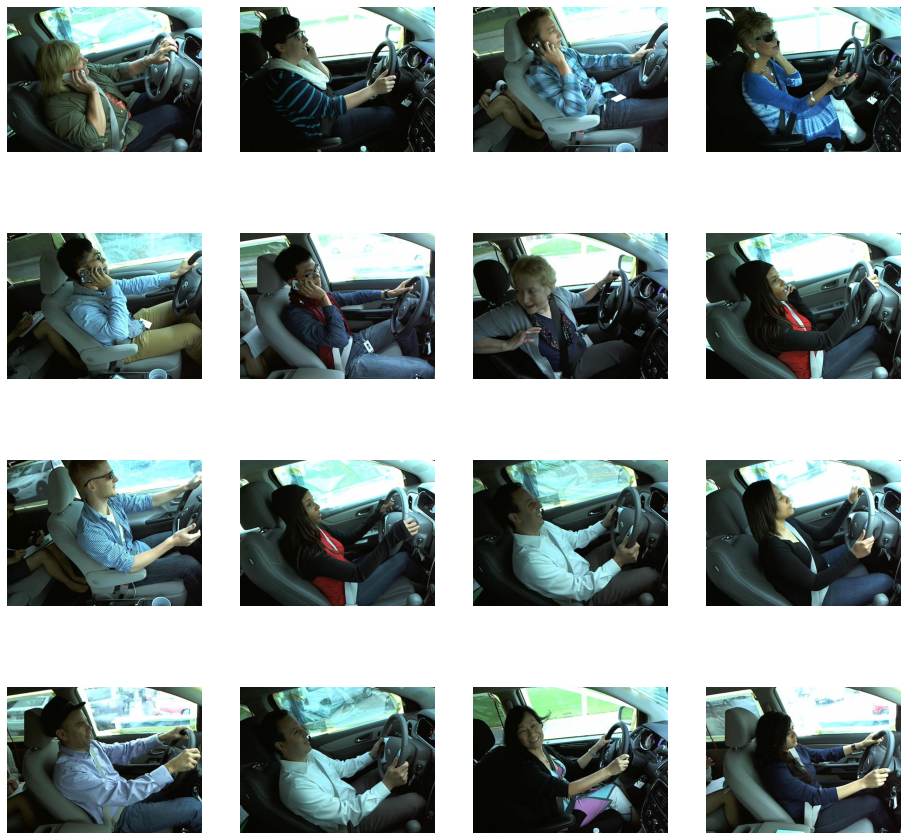

In [ ]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_names[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
# Create Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ])

In [ ]:
# Gets the summary of the learning

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

# Compile model with Adam

model.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#Data Preprocessing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,)

In [ ]:
# Preprocess Data

train_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(300,300),
    batch_size = 128,
    class_mode = "binary"
) 

Found 4015 images belonging to 2 classes.


In [ ]:
# Fit model

history = model.fit(
    train_generator, 
    #validation_data = test_generator,
    epochs=100, 
    steps_per_epoch = 8,
    #validation_steps = 8,
    verbose = 1)

Epoch 1/100
8/8 [==============================] - 21s 3s/step - loss: 0.5599 - accuracy: 0.7381
Epoch 2/100
8/8 [==============================] - 29s 4s/step - loss: 0.5787 - accuracy: 0.6963
Epoch 3/100
8/8 [==============================] - 29s 4s/step - loss: 0.5282 - accuracy: 0.7285
Epoch 4/100
8/8 [==============================] - 25s 3s/step - loss: 0.5334 - accuracy: 0.7373
Epoch 5/100
8/8 [==============================] - 21s 3s/step - loss: 0.5331 - accuracy: 0.7169
Epoch 6/100
8/8 [==============================] - 21s 3s/step - loss: 0.5542 - accuracy: 0.7253
Epoch 7/100
8/8 [==============================] - 23s 3s/step - loss: 0.5226 - accuracy: 0.7480
Epoch 8/100
8/8 [==============================] - 23s 3s/step - loss: 0.5101 - accuracy: 0.7402
Epoch 9/100
8/8 [==============================] - 23s 3s/step - loss: 0.5177 - accuracy: 0.7549
Epoch 10/100
8/8 [==============================] - 23s 3s/step - loss: 0.5065 - accuracy: 0.7373
Epoch 11/100
8/8 [===========

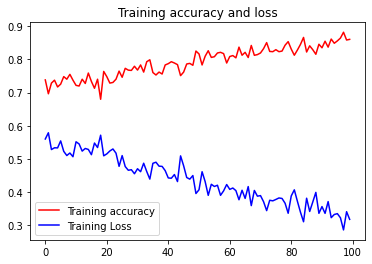

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training accuracy and loss')
plt.legend()

In [ ]:
file = []
label=[]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

test_names = os.listdir(test_dir)

for fn in test_names:
  try:
    # predicting images
    path = '/content/test/' + fn
    img = image.load_img(path, target_size=(300, 300))
    file.append(fn)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    if classes[0][0]>0.5:
      label.append(1)
    else:
      label.append(0)
  except:
    pass

In [ ]:
zipped = list(zip(file, label))
predictions = pd.DataFrame(zipped, columns=['file', 'label'])
predictions.head(15)

,file,label
0,img_54312.jpg,0
1,img_19246.jpg,1
2,img_45005.jpg,1
3,img_59016.jpg,0
4,img_76602.jpg,1
5,img_4672.jpg,0
6,img_99971.jpg,1
7,img_34741.jpg,1
8,img_27187.jpg,1
9,img_38113.jpg,1


In [ ]:
len(predictions)

1400

ada satu file image yang corrupt sehingga tidak bisa diload dan dipredict

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
#Submission
predictions.to_csv('submissions.csv',index=False)